Feature selection is the part of the life cycle of a data science project after feature engineering then where we do a lot of things like:-(handle missing values, normalization, take care of imbalanced dataset) after all this we do feature selection.

Feature selection is very very handy because there is something called as curse of dimensionality that basically means that suppose if in our data set we have around 500 features or 600 features at that particular case if we try to train our model with those dataset it may not perform well, so we need to basically perform feature selection.

There are various techniques  for feature selection:-

 # Feature Selection (1)- Dropping constant features

In this step we will be removing the features which have contant featres which are actually not important for solving he problem statement(ML).

In [1]:
#Import pandas to create DataFrame
import pandas as pd

# Make DataFrame of the given data
data = pd.DataFrame({"A":[1,2,3,4,2,3,5],
                     "B":[5,6,7,8,9,1,2],
                     "c":[0,0,0,0,0,0,0],
                     "D":[1,1,1,1,1,1,1]})

In [2]:
data.head()

,A,B,c,D
0,1,5,0,1
1,2,6,0,1
2,3,7,0,1
3,4,8,0,1
4,2,9,0,1


**Variance Threshold**<br><br>Features selction that removes all low-variance fetures.<br><br>This feature selection algorithm looks only at the features(X), not the desired outputs(y), and can thus be used for unsupervised learning (train_labels).

In [3]:
#it will remove zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thes = VarianceThreshold(threshold=0) 
var_thes.fit(data)

VarianceThreshold(threshold=0)

In [4]:
var_thes.get_support() #true means non zero variance features

array([ True,  True, False, False])

In [7]:
data.columns[var_thes.get_support()]

Index(['A', 'B'], dtype='object')

In [12]:
constant_columns = [column for column in data.columns
                   if column not in data.columns[var_thes.get_support()]]

In [13]:
print(len(constant_columns))

2


In [14]:
for feature in constant_columns:
    print(feature)

c
D


In [15]:
data.drop(constant_columns, axis=1,inplace= True)#drop constant variance feture

In [16]:
data

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
4,2,9
5,3,1
6,5,2


**Lets practise on bigger dataset**<br>
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In [2]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [6]:
#read data
df = pd.read_csv("C:\\Users\\vaibh\\FeaureSelection\\data\\santander\\train.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df.shape

(76020, 371)

In [7]:
X = df.drop(labels = ["TARGET"],axis = 1)
y = df["TARGET"]

**Lets apply the variance threshold**

In [8]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
# finding non constant features
sum(var_thres.get_support())

336

In [12]:
# find constant features
constant_columns = [column for column in X.columns
                   if column not in X.columns[var_thres.get_support()]]
print(len(constant_columns))
# we have 34 constant features


34


In [13]:
# see constant features
for columns in constant_columns:
    print(columns)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [26]:
X.drop(constant_columns,axis=1) # now we have non constant features

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


# Feature Selection (2)- with Correlation

In this step we wil be removing the features which are highly correlated.

In [27]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"]= data.target

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
#remember  If an independent features is highly correlated with dependent feature we did not remove those kind of features because those features can play a very important role when we are training our machine Learning model.

#but if we have independent features are highly correlated with each other by more than 90 percent then from those correlated feature We just using one.

In [34]:
X= df.drop("MEDV",axis = 1)  #Feature Matrix
y = df["MEDV"]

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


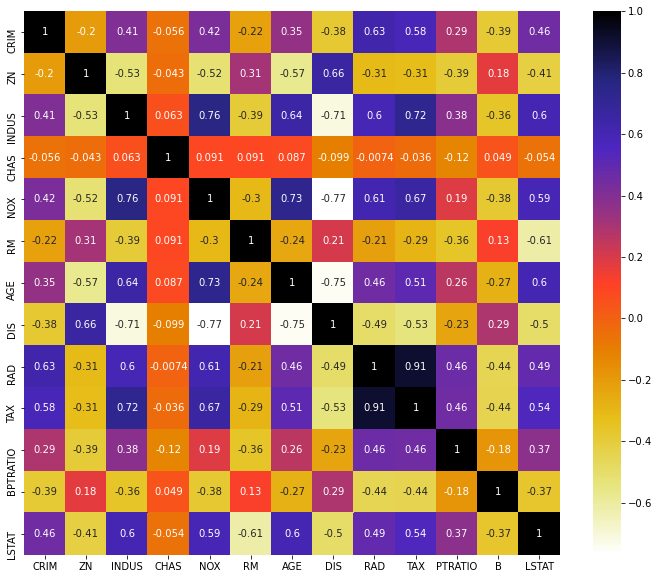

In [36]:
# see heat map
import seaborn as sns
#using Pearson Correlation range btw(-1 to +1)
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [50]:
# with the following function we can select highly correlated features
#it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #if abs(corr_matrix.iloc[i,j])> threshold: (we are interested in absolute coeff values)
            if (corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
corr_features = correlation(X,0.7)
len(set(corr_features))

3

In [52]:
corr_features # these features are correlated with other more than 70%

{'AGE', 'NOX', 'TAX'}

(AGE is highly correlated with NOX ), (NOX is highly correlated with AGE and INDUS) nad (TAX is highly correlated with RAD and INDUS)

In [55]:
X.drop(corr_features, axis = 1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,6.120,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,6.976,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,6.794,2.3889,1.0,21.0,393.45,6.48


# Feature Selection (3)- Information gain- mutual information In Classification

**Mutual Information**<br><br>MI Estimate mutual information for a discrete target variable.<br><br>Mutual information(MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables independent, and higher values mean higher dependency.<br><br>The function relies on nonparametric methods based on **entropy** estimation from k-nearest neighbors distances.<br><br>Inshort<br><br>A quantity called mutual information measures the amount of information one can obtain from one random variable given another. <br><br>The mutual information between two random variables X and Y can be stated formally as follws:


**l(X;Y) = H(X) - H(X|Y) Where l(X;Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [56]:
import pandas as pd
from sklearn.datasets import load_wine

In [59]:
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [61]:
df["Wine"]= data.target

In [62]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [64]:
df["Wine"].unique()

array([0, 1, 2])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Wine 

In [66]:
# train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["Wine"],axis=1),df["Wine"],
                                                   test_size = 0.3,
                                                   random_state = 0)

In [67]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0


In [69]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.4264427 , 0.29489568, 0.16856955, 0.23142162, 0.20153728,
       0.46781487, 0.71315468, 0.12759168, 0.25714423, 0.62028546,
       0.55288705, 0.54420353, 0.52490217])

In [70]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

flavanoids                      0.713155
color_intensity                 0.620285
hue                             0.552887
od280/od315_of_diluted_wines    0.544204
proline                         0.524902
total_phenols                   0.467815
alcohol                         0.426443
malic_acid                      0.294896
proanthocyanins                 0.257144
alcalinity_of_ash               0.231422
magnesium                       0.201537
ash                             0.168570
nonflavanoid_phenols            0.127592
dtype: float64

<AxesSubplot:>

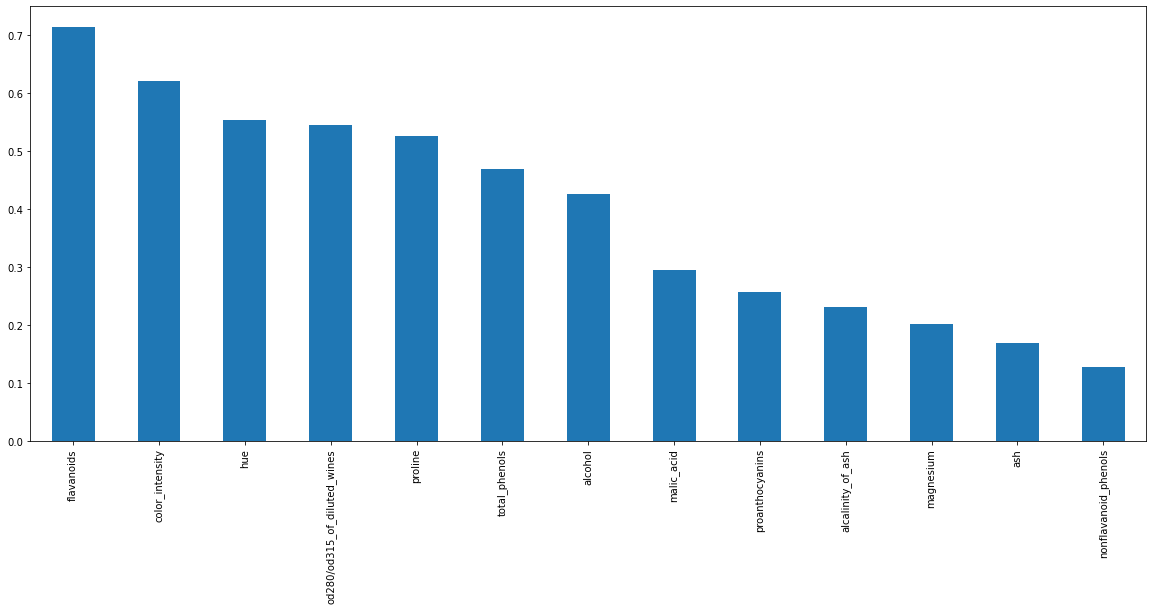

In [73]:
# let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending= False).plot.bar(figsize= (20, 8))

In [74]:
#select high correlated features
from sklearn.feature_selection import SelectKBest

#No we will select the top 5 import features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train,y_train )
X_train.columns[sel_five_cols.get_support()]

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

**Difference Between Information Gain and Mutual Information**<br><br>I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

# Feature Selection (4)- Information gain- mutual information In Regression

**Mutal Information**<br><br>Estimate mutual information for a continuous target variable.<br><br>Mutual information(MI) between two random variables is a non-negative values,which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean high dependency.<br><br>The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distance.<br><br>Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.<br><br>Inshort<br><br>A quantity called mutual information measures the amount of information one can obtain from one random variable given another.<br><br>The mutual information between two random variables X and Y can be stated formally as follows:<br><br>**l(X;Y)= H(x)-H(X|Y) Where l(X;Y) is the mutual information for X and Y,H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y. The result has the units fro bits.**

In [2]:
import pandas as pd
#data is advance_house_pricing
housing_df = pd.read_csv("C:\\Users\\vaibh\\FeaureSelection\\data\\house.csv")

In [3]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
numeric_lst = ["int32","int64","float32","float64"]
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [10]:
housing_df = housing_df[numerical_cols]

In [11]:
housing_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [17]:
housing_df.drop("Id",axis=1,inplace=True)

In [18]:
#It is always a good practice to split train and test data to prevent overitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_df.drop(labels=["SalePrice"],axis = 1),housing_df["SalePrice"],
                                                   test_size=0.3,
                                                   random_state = 0)

In [19]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009


In [20]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [23]:
from sklearn.feature_selection import mutual_info_regression
#determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([2.60386597e-01, 2.16230327e-01, 1.63610286e-01, 5.27750944e-01,
       1.09165482e-01, 3.54530276e-01, 2.45518473e-01, 1.02696471e-01,
       1.60751577e-01, 6.58676372e-03, 1.14342631e-01, 3.82471850e-01,
       3.10697689e-01, 2.29317222e-01, 1.71760490e-04, 4.80788633e-01,
       2.46937422e-02, 1.00670202e-03, 2.59163789e-01, 7.12071197e-02,
       3.60502466e-02, 2.06310340e-03, 1.84707432e-01, 1.78068779e-01,
       2.72592609e-01, 3.72568773e-01, 3.68454188e-01, 7.23382385e-02,
       1.76766264e-01, 7.20910679e-03, 0.00000000e+00, 1.62089725e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.04023558e-03])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.527751
GrLivArea        0.480789
TotalBsmtSF      0.382472
GarageCars       0.372569
GarageArea       0.368454
YearBuilt        0.354530
1stFlrSF         0.310698
GarageYrBlt      0.272593
MSSubClass       0.260387
FullBath         0.259164
YearRemodAdd     0.245518
2ndFlrSF         0.229317
LotFrontage      0.216230
TotRmsAbvGrd     0.184707
Fireplaces       0.178069
OpenPorchSF      0.176766
LotArea          0.163610
BsmtFinSF1       0.160752
BsmtUnfSF        0.114343
OverallCond      0.109165
MasVnrArea       0.102696
WoodDeckSF       0.072338
HalfBath         0.071207
BedroomAbvGr     0.036050
BsmtFullBath     0.024694
ScreenPorch      0.016209
EnclosedPorch    0.007209
BsmtFinSF2       0.006587
YrSold           0.003040
KitchenAbvGr     0.002063
BsmtHalfBath     0.001007
LowQualFinSF     0.000172
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

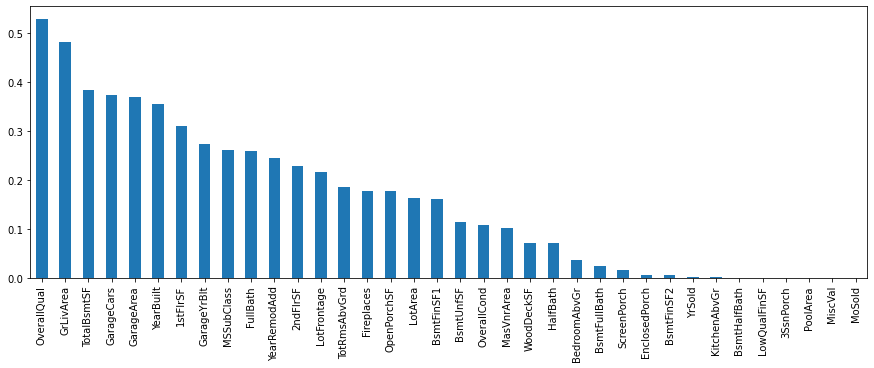

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [28]:
from sklearn.feature_selection import SelectKBest

#No we will select the top 5 import features
sel_five_cols = SelectKBest(mutual_info_regression, k=10)
sel_five_cols.fit(X_train.fillna(0),y_train )
X_train.columns[sel_five_cols.get_support()]

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [26]:
from sklearn.feature_selection import SelectPercentile

In [27]:
#selecting the top 20 perecentile
selected_top_columns= SelectPercentile(mutual_info_regression, percentile = 20)
selected_top_columns.fit(X_train.fillna(0), y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Feature Selection (5)- Chi Square Fro Feature Selection

**Fisher Score - Chisquare Test For Feature Selection**<br><br>Compute chi-squared stats between each non-negative feature and class.<br><br>This score should be used to evaluate categorical variables in a classification task.<br><br>This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X,which must contain only non-negative features such as booleans or frequencies(eg.,term counts in document classification),relative to the classes.<br><br>Recall that the chi-square test measures dependence between stochastic vaiables,so using this function "weeds out" the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical values.<br><br>It compares the observed distribution of the diffent classes of target Y among the different categories of the feature,against the expected distribution of the target classes,regardless of the feature categories.

In [29]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
##['sex','embarked','class','who','adult_male','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [37]:
#label encoding
import numpy as np
df["sex"]= np.where(df['sex']=='male',1,0)
df["alone"]=np.where(df["alone"]==True,1,0)
#Let's perform label encoding on embarked 
ordinal_label = {k:i for i, k in enumerate(df['embarked'].unique(),0)}
df['embarked']=df['embarked'].map(ordinal_label)

In [39]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [38]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [41]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=["survived"],axis = 1),
                                                df["survived"],test_size=0.3,random_state=0)

In [42]:
X_train.head()

,sex,embarked,alone,pclass
857,1,0,1,1
52,0,1,0,1
386,1,0,0,3
124,1,0,0,1
578,0,1,0,3


In [43]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [45]:
#perform chi2 test
## chi2 return 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train,y_train)

In [46]:
f_p_values
#Fscore is higher is good
#pvalue is smaller is good

(array([63.55447864, 11.83961845,  9.03328564, 21.61080949]),
 array([1.55992554e-15, 5.79837058e-04, 2.65107556e-03, 3.33964360e-06]))

In [52]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values.sort_index(ascending=False)

sex         1.559926e-15
pclass      3.339644e-06
embarked    5.798371e-04
alone       2.651076e-03
dtype: float64

In [51]:
fscore = pd.Series(f_p_values[0])
fscore.index = X_train.columns
fscore.sort_index(ascending=True)

alone        9.033286
embarked    11.839618
pclass      21.610809
sex         63.554479
dtype: float64


sex and pcalss is most important column when compared to the output feature survived.

# Feature Selection Techniques